# -------- Holiday Package Destination ---------

In [2]:
cd C:\Users\TANMAYA SAHU\Downloads\Data sci project

C:\Users\TANMAYA SAHU\Downloads\Data sci project


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('Travel.csv')
data.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


- The term "ProdTaken" typically stands for "Product Taken." In the context of your dataset, it likely represents whether a customer has taken or purchased a product or service.

- So, "ProdTaken" indicates customer purchase behavior, specifically whether the customer has taken the product or service being offered. It's a common target variable used in predictive modeling to understand and predict customer purchase decisions.

In [6]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [7]:
data.shape

(4888, 20)

In [8]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
# Removing Null Values

data['Age'].fillna(data['Age'].mean(),inplace=True)
data['DurationOfPitch'].fillna(data['DurationOfPitch'].mean(),inplace=True)
data['NumberOfChildrenVisiting'].fillna(method='bfill', inplace=True)
data['NumberOfTrips'].fillna(method='bfill', inplace=True)
data['NumberOfFollowups'].fillna(method='bfill', inplace=True)
data['PreferredPropertyStar'].fillna(method='bfill', inplace=True)

In [10]:
data = data.dropna().reset_index(drop=True)

In [11]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [12]:
data.head(2)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0


In [13]:
data['TypeofContact'].value_counts()


Self Enquiry       3306
Company Invited    1349
Name: TypeofContact, dtype: int64

In [14]:
data['Occupation'].value_counts()

Salaried          2263
Small Business    1970
Large Business     420
Free Lancer          2
Name: Occupation, dtype: int64

In [15]:
data['Gender'].value_counts()

Male       2781
Female     1719
Fe Male     155
Name: Gender, dtype: int64

In [16]:
data[data['Gender']=='Fe Male'][:2]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
19,200022,0,34.0,Self Enquiry,1,13.0,Salaried,Fe Male,2,3.0,Standard,4.0,Unmarried,1.0,0,3,1,0.0,Senior Manager,26994.0
49,200055,0,33.0,Company Invited,1,6.0,Salaried,Fe Male,3,3.0,Standard,3.0,Unmarried,2.0,1,2,1,0.0,Senior Manager,28458.0


In [17]:
data['Gender'] = data['Gender'].str.replace(' ', '', regex=True)

In [18]:
data['Gender'].value_counts()

Male      2781
Female    1719
FeMale     155
Name: Gender, dtype: int64

In [19]:
data['Gender'] = data['Gender'].str.replace('FeMale', 'Female', regex=True)

In [20]:
data['Gender'].value_counts()

Male      2781
Female    1874
Name: Gender, dtype: int64

In [21]:
data['ProductPitched'].value_counts()

Basic           1755
Deluxe          1586
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [22]:
data['MaritalStatus'].value_counts()

Married      2228
Divorced      902
Single        843
Unmarried     682
Name: MaritalStatus, dtype: int64

In [23]:
data['Designation'].value_counts()

Executive         1755
Manager           1586
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [24]:
# Replace Object type values to numeric

In [25]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['TypeofContact']=label.fit_transform(data['TypeofContact'])
print(data['TypeofContact'].unique())

data['Occupation']=label.fit_transform(data['Occupation'])
print(data['Occupation'].unique())

data['Gender']=label.fit_transform(data['Gender'])
print(data['Gender'].unique())

data['ProductPitched']=label.fit_transform(data['ProductPitched'])
print(data['ProductPitched'].unique())

data['MaritalStatus']=label.fit_transform(data['MaritalStatus'])
print(data['MaritalStatus'].unique())

data['Designation']=label.fit_transform(data['Designation'])
print(data['Designation'].unique())

[1 0]
[2 0 3 1]
[0 1]
[1 0 3 4 2]
[2 0 1 3]
[2 1 3 0 4]


In [26]:
data[:3]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,1,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,200001,0,49.0,0,1,14.0,2,1,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0
2,200002,1,37.0,1,1,8.0,0,1,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0


<AxesSubplot:>

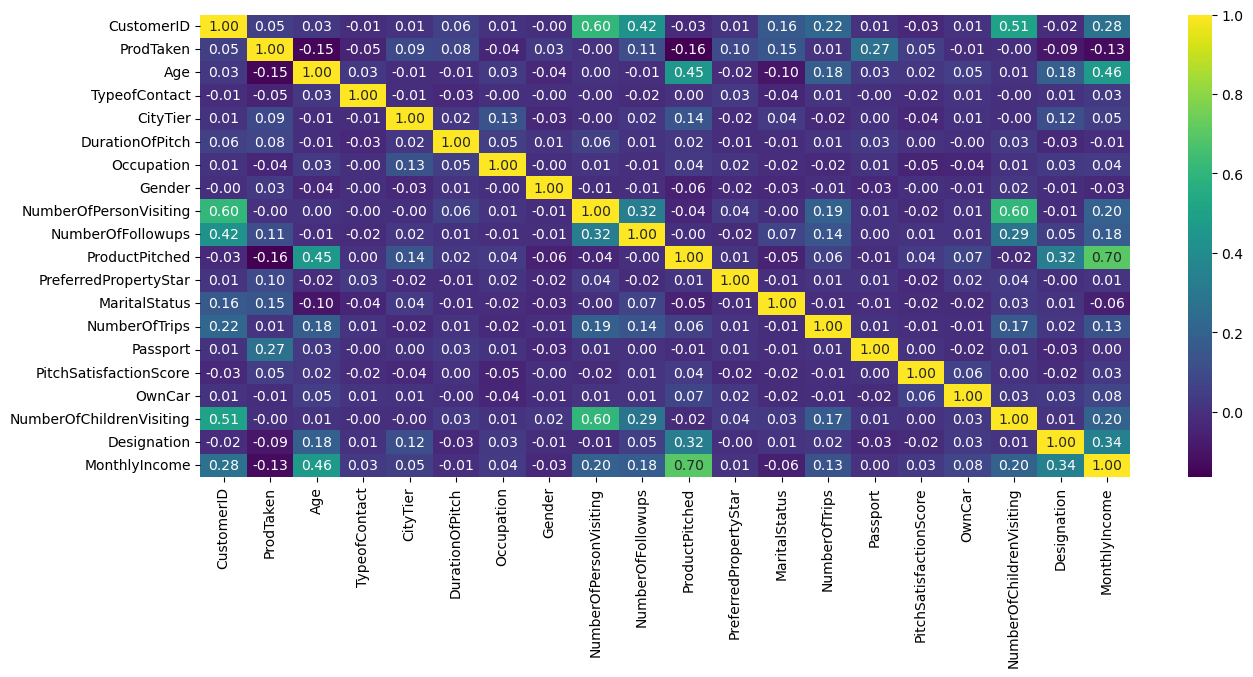

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='viridis')

In [28]:
X=data.drop(['CustomerID','ProdTaken'],axis=1)
X[:1]

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,1,3,6.0,2,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0


In [29]:
y=data['ProdTaken']
y[:3]

0    1
1    0
2    1
Name: ProdTaken, dtype: int64

In [67]:
#Basically here i am taking all regression algorithms and check which algorithm has good accuracy.

In [30]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [60]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

svc=SVC()
svc.fit(X_train,y_train)

gnb=GaussianNB()
gnb.fit(X_train,y_train)

dt=DecisionTreeClassifier(criterion="gini",       # or "entropy"
                          splitter="best",        # or "random"
                          max_depth=3,            # or None
                          min_samples_split=5,    # or other integer
                          min_samples_leaf=2,     # or other integer
                          max_features=None  )     # or "sqrt", "log2", or an integer/float)
dt.fit(X_train,y_train)

gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)

rfr=RandomForestClassifier(n_estimators=100,
    criterion="gini",       # or "entropy"
    max_depth=3,            # or None
    min_samples_split=5,    # or other integer
    min_samples_leaf=2,     # or other integer
    max_features="sqrt" )    # or "auto", "log2", None, or an integer/float
rfr.fit(X_train,y_train)

C:\Users\TANMAYA SAHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5)

In [59]:
print('Logistic Score        :',lg.score (X_train,y_train))
#print('KNN Score             :',knn.score(X_train,y_train))
print('SVC Score             :',svc.score(X_train,y_train))
print('Navie Bayes Score     :',gnb.score(X_train,y_train))
print('GradientBoosting Score:',gr.score (X_train,y_train))
print('DecisionTree Score    :',dt.score (X_train,y_train))
print('RandomForest Score    :',rfr.score(X_train,y_train))

Logistic Score        : 0.8360957642725598
SVC Score             : 0.809085328422345
Navie Bayes Score     : 0.836402701043585
GradientBoosting Score: 0.8956414978514426
DecisionTree Score    : 0.830877839165132
RandomForest Score    : 0.8179864947820749


In [62]:
lg_ypred =lg.predict (X_test)
#knn_ypred=knn.predict(X_test)
svc_ypred=svc.predict(X_test)
gnb_ypred=gnb.predict(X_test)
gr_ypred =gr.predict (X_test)
dt_ypred =dt.predict (X_test)
rfr_ypred=rfr.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
print('Logistic Accuracy        :',accuracy_score(y_test,lg_ypred))
#print('KNN Accuracy             :',accuracy_score(y_test,knn_ypred))
print('SVC Accuracy             :',accuracy_score(y_test,svc_ypred))
print('Navie Bayes Accuracy     :',accuracy_score(y_test,gnb_ypred))
print('GradientBoosting Accuracy:',accuracy_score(y_test,gr_ypred))
print('DecisionTree Accuracy    :',accuracy_score(y_test,dt_ypred))
print('RandomForest Accuracy    :',accuracy_score(y_test,rfr_ypred))

Logistic Accuracy        : 0.8346456692913385
SVC Accuracy             : 0.8095919828203293
Navie Bayes Accuracy     : 0.8339298496778812
GradientBoosting Accuracy: 0.8675733715103794
DecisionTree Accuracy    : 0.8346456692913385
RandomForest Accuracy    : 0.82319255547602


In [65]:
from sklearn.metrics import classification_report
print(classification_report(gr_ypred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1236
           1       0.45      0.75      0.57       161

    accuracy                           0.87      1397
   macro avg       0.71      0.82      0.74      1397
weighted avg       0.91      0.87      0.88      1397



In [66]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, gr_ypred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1091   40]
 [ 145  121]]
